In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd

Белый шум

In [2]:
duration = 5  # Продолжительность в секундах
sample_rate = 4100  # Частота дискретизации в Гц
num_samples = int(duration * sample_rate)
white_noise_g = np.random.normal(loc = 0, scale = 1, size = num_samples)
print(white_noise_g)

[-2.11840696 -1.22656835  1.38387579 ...  1.02281711 -1.73035472
  0.94613255]


Аудио

In [10]:
def play_audio(audio_data, sample_rate):
    sd.play(audio_data, sample_rate)
    sd.wait()

1. Генерим розовый шум путем применения преобразования фурье к белому шуму

In [3]:
spectrum = np.fft.rfft(white_noise_g)
pink_noise = np.real(spectrum) / np.sqrt(np.arange(1, len(spectrum) + 1))
pink_signal = np.fft.irfft(pink_noise, n=num_samples)
pink_signal /= np.max(np.abs(pink_signal))
print(pink_signal)

[-0.57472604 -0.29268082 -0.22066805 ... -0.11483804 -0.22066805
 -0.29268082]


Отрисовка

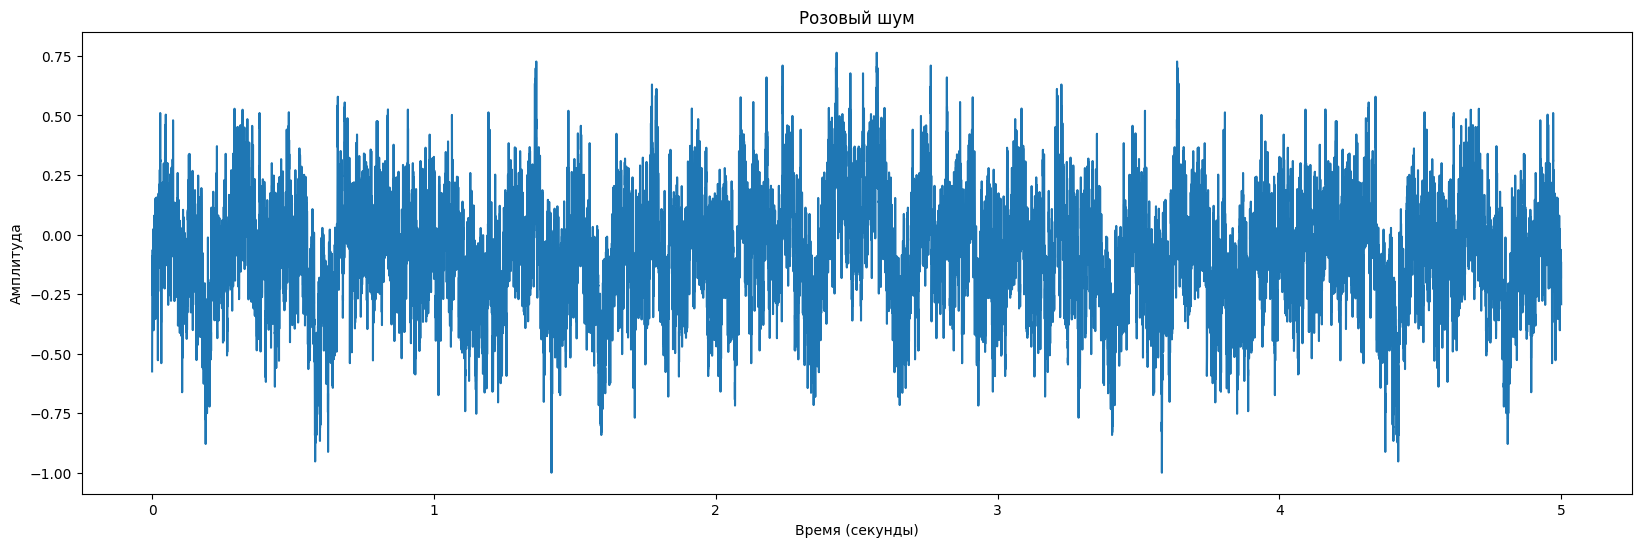

In [4]:
time_axis = np.linspace(0, duration, len(pink_signal)) 

plt.figure(figsize=(20, 6))  

plt.plot(time_axis, pink_signal)

plt.title('Розовый шум')
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')

plt.show()

2. Генерируем черный шум.

In [5]:
import scipy

kb =  scipy.constants.k
h = scipy.constants.physical_constants['Planck constant'][0]
c = scipy.constants.c

print(kb)
print(h)
print(c)

T = 17*1/np.power(10, 9)  #Температура 17 нанокельвинов
G = 10

coef1 = 2*h/(c*c*T*T*T)
coef2 = h/(kb*T)

freq1 = 1000

# количество элементов в записи сигнала. Для 17 нанокельвинов полоса пропускания шума будет от 1Гц до 12 кГц
num_samples = int(duration * freq1)


# Частоты, на которых будем генерировать

black_noise = np.zeros(num_samples)   # подготовили лист для записи сигнала
time_axis = np.arange(num_samples) / sample_rate   # задали временную ось

black_noise = np.zeros(num_samples)
time_axis = np.arange(num_samples) / sample_rate
eq = 10 * np.log(coef1*np.power(freq1,3)/(np.exp(coef2*freq1)-1)) + 10 # эквалайзер

white_noise_g = np.random.normal(loc = 0, scale = 1, size = num_samples) # опять белый шум

black_noise = white_noise_g + eq # применяем преобразование к белому шуму

black_noise /= np.max(np.abs(black_noise))  # Нормализация амплитуды к [-1, 1]

1.380649e-23
6.62607015e-34
299792458.0


Отрисовка

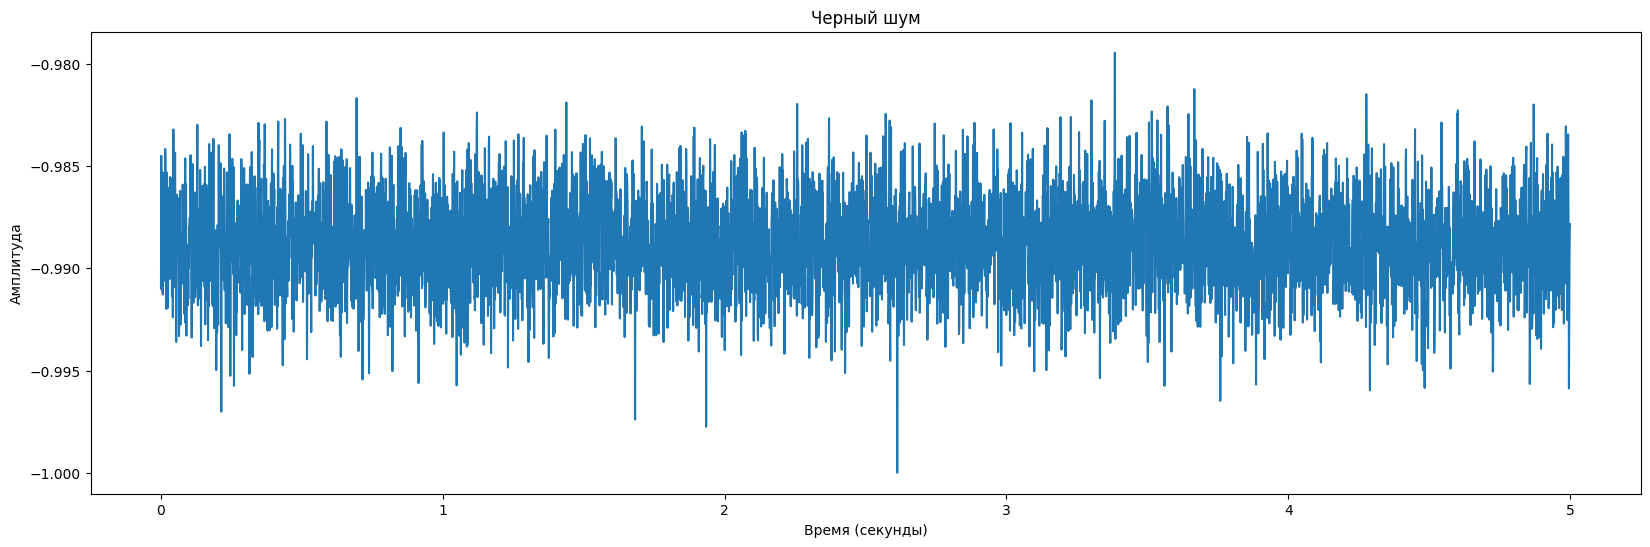

In [6]:
time_axis = np.linspace(0, duration, len(black_noise))
plt.figure(figsize=(20, 6))
plt.plot(time_axis, black_noise)
plt.title('Черный шум')
plt.xlabel('Время (секунды)')
plt.ylabel('Амплитуда')
plt.show()

3. Генерируем не зашумленный сигнал по любой функции. Зашумляем его любыми шумами.

In [8]:
duration = 5  # Продолжительность в секундах
sample_rate = 4100  # Частота дискретизации в Гц
num_samples = int(duration * sample_rate)
time_points = np.linspace(0, duration, num_samples)  # Создаем равномерные временные точки от 0 до 5 секунд
 # Генерим белый шум

values = np.sin(time_points*np.pi) # вычисляем амплитуды сигнала по синусоидальному закону

values_noise = values + pink_signal # зашумляем сигнал

Отрисовка

C:\Users\pokum\AppData\Local\Temp\ipykernel_23900\4023954802.py:27: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([c0, c1, c2],


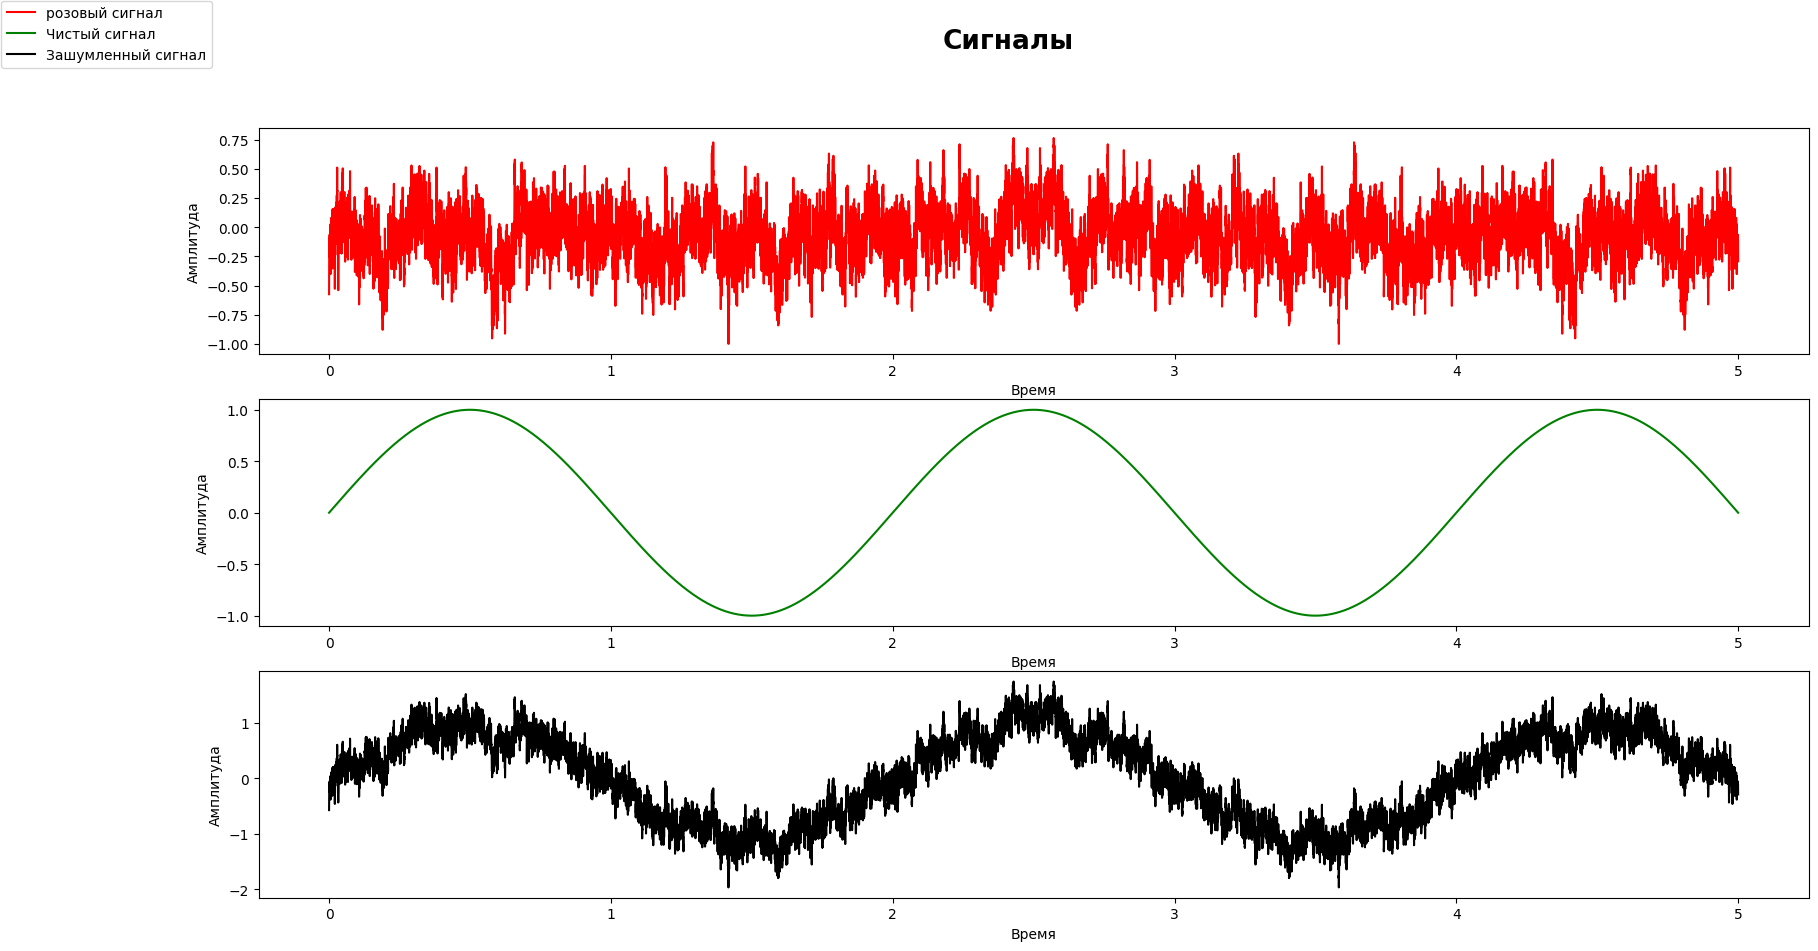

In [9]:
# Отрисовываем
# хотим нарисовать все на одном рисунке. Нам нужно 3 рисунка, один под другим.
fig, axs = plt.subplots(3, 1, figsize=(20, 10))


# общий заголовок для всей картинки
fig.suptitle('Сигналы', fontsize=19, fontweight='bold')

labels = ["розовый сигнал", "Чистый сигнал", "Зашумленный сигнал"]

# определяем, что будем отрисовывать на 1 графике. По x - время, по y - амплитуды
c0 = axs[0].plot(time_points, pink_signal, color="red")
axs[0].set_xlabel('Время')
axs[0].set_ylabel('Амплитуда')

# определяем, что будем отрисовывать. По x - время, по y - амплитуды
c1 = axs[1].plot(time_points, values, color="green")
axs[1].set_xlabel('Время')
axs[1].set_ylabel('Амплитуда')

# определяем, что будем отрисовывать. По x - время, по y - амплитуды
c2 = axs[2].plot(time_points, values_noise, color="black")
axs[2].set_xlabel('Время')
axs[2].set_ylabel('Амплитуда')

# отрисовываем общую легенду
fig.legend([c0, c1, c2],
           labels=labels,
           loc='upper left',
           borderaxespad=0.1)